In [144]:
from __future__ import absolute_import, division, print_function, unicode_literals
from sklearn.preprocessing import MinMaxScaler

# Install TensorFlow
try:
    
  # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
tf.__version__


'2.0.0'

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [212]:
file = pd.read_csv('processed.cleveland.data',header = None,encoding = "ISO-8859-1",na_values=['?']).dropna()

In [213]:
pf = pd.DataFrame(file)

In [214]:
pd.options.display.max_rows

500

In [215]:

pd.set_option('display.max_rows', 500)

In [216]:
pf= pd.DataFrame(pf)

In [440]:
pf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [465]:
c = pf.drop(columns=[1,5,6,8])


In [502]:
#Defining x_label and y_label
x = c.loc[:,0:12]
y = 1.0*(c.loc[:, 13] > 0)

In [503]:
print(x.shape,y.shape)

(297, 9) (297,)


In [504]:
x_train = x.loc[0:149,:]
x_test = x.loc[250:,:]
x_val = x.loc[150:250,:]
y_train = y.loc[0:149]
y_test = y.loc[250:]
y_val = y.loc[150:250]

In [505]:
#Normalizing the DataFrame
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std
x_val -= mean
x_val /= std

In [506]:
x_train = np.array(x_train)

In [507]:
min_max_scaler = preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train)
x_val_minmax = min_max_scaler.fit_transform(x_val)
x_test_minmax = min_max_scaler.fit_transform(x_test)

In [508]:
x_train_minmax.shape

(149, 9)

In [532]:
model = Sequential()
model.add(Dense(64, activation='sigmoid',
            input_shape=(x_train_minmax.shape[1],)))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

In [540]:

x_train = np.asarray(x_train)
x_val = np.asarray(x_val)
x_train_minmax = np.asarray(x_train_minmax)
y_train = np.asarray(y_train)
x_val_minmax = np.asarray(x_val_minmax)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

In [541]:
values = model.fit(x_train_minmax, y_train, epochs=100,batch_size=3,verbose=1,validation_data = (x_val_minmax, y_val))


Train on 149 samples, validate on 99 samples
Epoch 1/100
149/149 [==============================] - 0s 1ms/sample - loss: 0.1047 - accuracy: 0.8792 - val_loss: 0.1491 - val_accuracy: 0.7879
Epoch 2/100
149/149 [==============================] - 0s 1ms/sample - loss: 0.1058 - accuracy: 0.8658 - val_loss: 0.1659 - val_accuracy: 0.7677
Epoch 3/100
149/149 [==============================] - 0s 992us/sample - loss: 0.1025 - accuracy: 0.8993 - val_loss: 0.1483 - val_accuracy: 0.7778
Epoch 4/100
149/149 [==============================] - 0s 1ms/sample - loss: 0.1100 - accuracy: 0.8792 - val_loss: 0.1484 - val_accuracy: 0.7879
Epoch 5/100
149/149 [==============================] - 0s 984us/sample - loss: 0.1060 - accuracy: 0.8725 - val_loss: 0.1664 - val_accuracy: 0.7576
Epoch 6/100
149/149 [==============================] - 0s 1ms/sample - loss: 0.1099 - accuracy: 0.8591 - val_loss: 0.1584 - val_accuracy: 0.7778
Epoch 7/100
149/149 [==============================] - 0s 1ms/sample - loss: 0.10

In [452]:
import matplotlib.pyplot as plt

print(values.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [542]:
value = model.fit(x_test_minmax, y_test, epochs=50,batch_size=1,verbose=1)

Train on 50 samples
Epoch 1/50
50/50 [==============================] - 0s 2ms/sample - loss: 0.1707 - accuracy: 0.7800
Epoch 2/50
50/50 [==============================] - 0s 2ms/sample - loss: 0.1565 - accuracy: 0.8000
Epoch 3/50
50/50 [==============================] - 0s 2ms/sample - loss: 0.1705 - accuracy: 0.7600
Epoch 4/50
50/50 [==============================] - 0s 3ms/sample - loss: 0.1545 - accuracy: 0.8000
Epoch 5/50
50/50 [==============================] - 0s 2ms/sample - loss: 0.1598 - accuracy: 0.8000
Epoch 6/50
50/50 [==============================] - 0s 2ms/sample - loss: 0.1628 - accuracy: 0.8000
Epoch 7/50
50/50 [==============================] - 0s 2ms/sample - loss: 0.1574 - accuracy: 0.8000
Epoch 8/50
50/50 [==============================] - 0s 1ms/sample - loss: 0.1570 - accuracy: 0.8000
Epoch 9/50
50/50 [==============================] - 0s 2ms/sample - loss: 0.1512 - accuracy: 0.8000
Epoch 10/50
50/50 [==============================] - 0s 2ms/sample - loss: 0.158

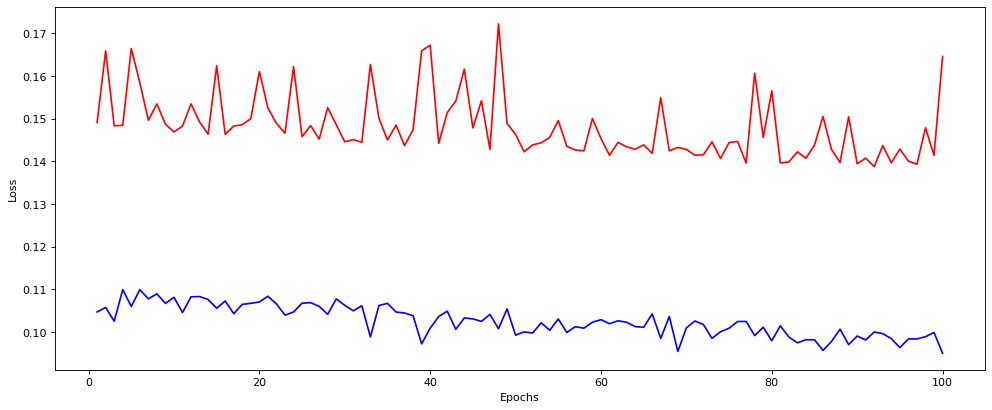

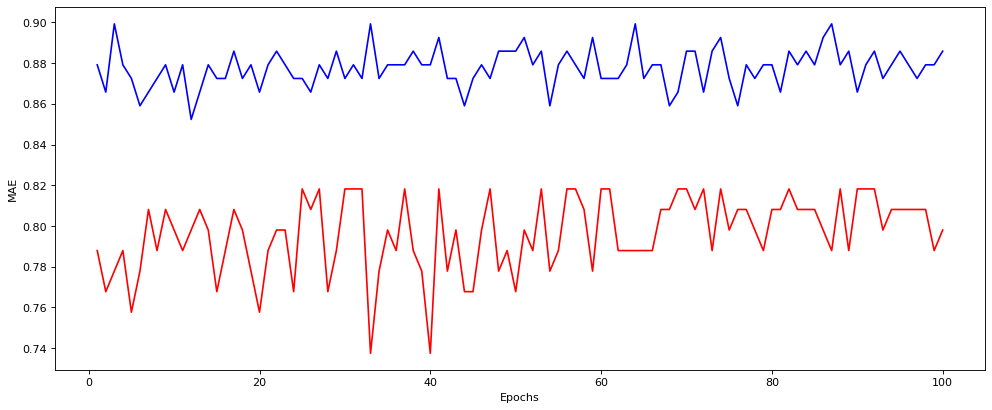

In [543]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
loss = values.history['loss']
val_loss = values.history['val_loss']
mae = values.history['accuracy']
val_mae = values.history['val_accuracy']

time = range(1,len(loss)+1)


plt.plot(time, loss, 'b-')
plt.plot(time, val_loss, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(time, mae, 'b-')
plt.plot(time, val_mae, 'r-')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()